In [1]:
import torch
from torchvision import datasets, transforms


transform = transforms.ToTensor()

gmm_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True, transform=transform),
        batch_size=10000, shuffle=False)

batch = enumerate(gmm_loader).__next__()[1]
X_MNIST = batch[0].view(gmm_loader.batch_size, 784)
labels = batch[1]

In [2]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_MNIST[i].view(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])

In [3]:
class Transpose(object):
    def __init__(self):
        pass
    def __call__(self, data):
        return data.transpose(-1,-2)
batch_size = 50000
EMNIST_train_loader = torch.utils.data.DataLoader(
    datasets.EMNIST('../data', split='letters', download=True, train=True, 
                    transform=transforms.Compose([transforms.ToTensor(), Transpose()])),
    batch_size=batch_size, shuffle=True)

batch = enumerate(EMNIST_train_loader).__next__()[1]
X_EMNIST = batch[0].view(EMNIST_train_loader.batch_size, 784)
E_labels = batch[1]

In [4]:
FMNIST_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST('../data/fashion', train=True, download=True, transform=transforms.ToTensor()),
        batch_size=1000, shuffle=False)

batch = enumerate(FMNIST_loader).__next__()[1]
X_FMNIST = batch[0].view(FMNIST_loader.batch_size, 784)
F_labels = batch[1]

In [5]:
a = [
    X_MNIST[labels==1],
    X_MNIST[labels==7],
    X_MNIST[labels==5],
    X_EMNIST[E_labels==24],
    torch.rand(500,784),
    X_FMNIST
    ]
al = ['1','7','5','x','rand','fashion']

In [25]:
A = [[(a1[:,None,:] - a2[None,:,:]).norm(dim=2, p=1).view(-1) for a1 in a] for a2 in a]

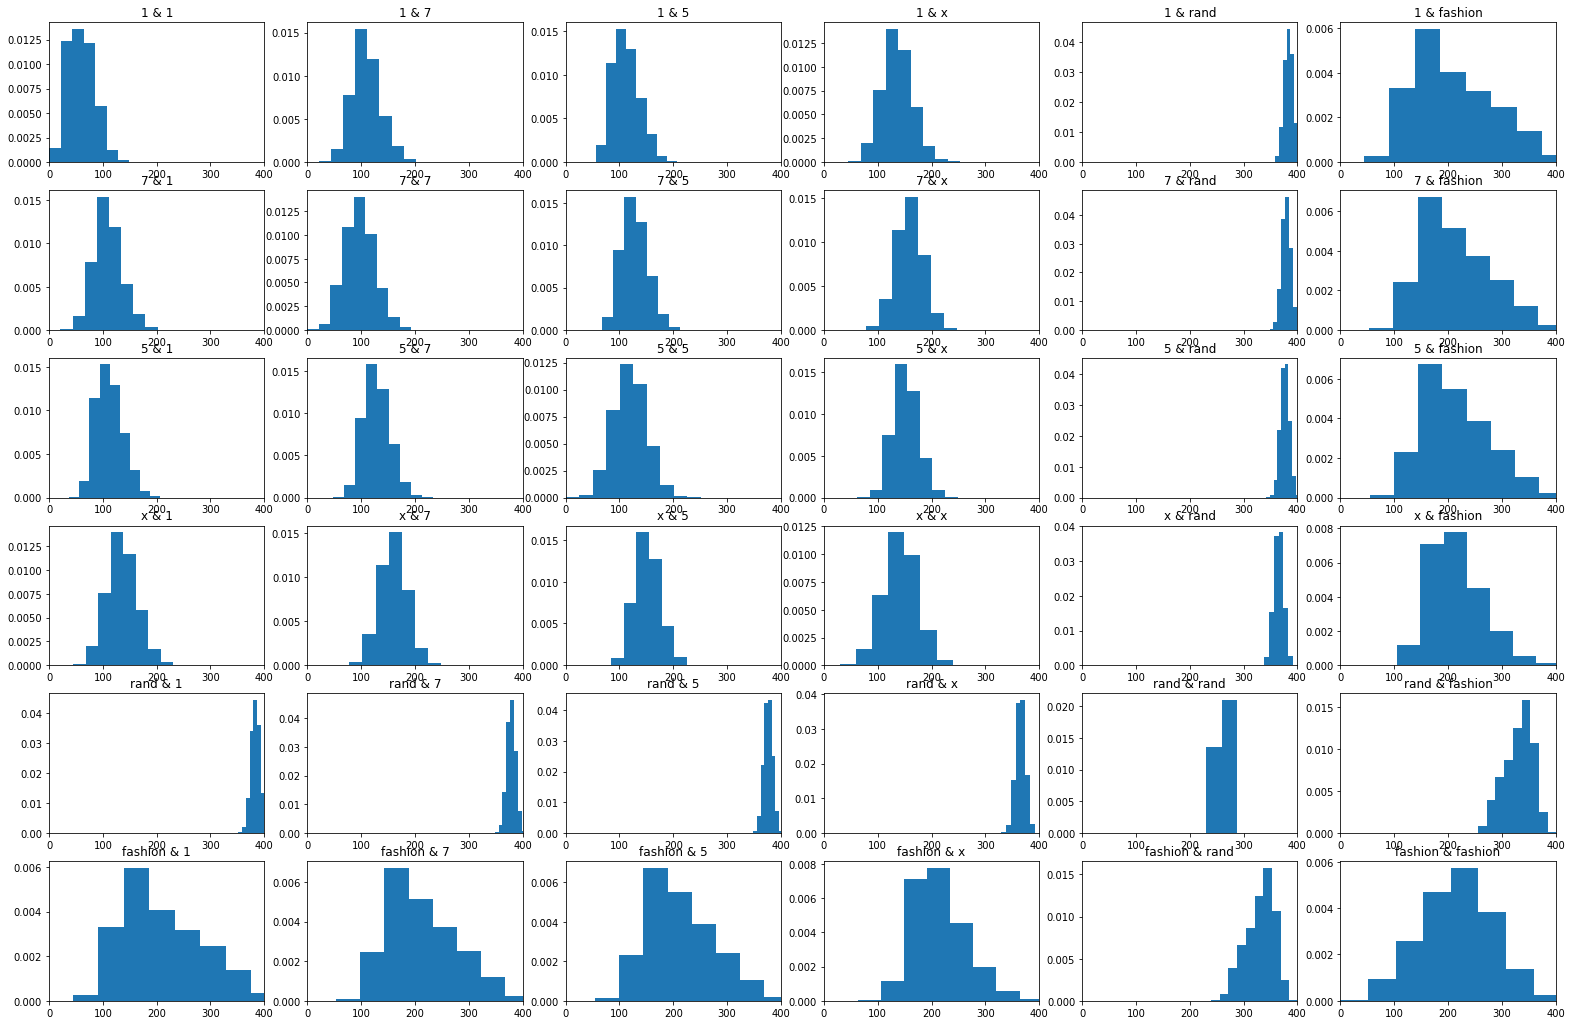

In [29]:
fig=plt.figure(figsize=(27, 18))

l = len(al)
for i in range(l):
    for j in range(l):
        plt.subplot(l,l,l*i+j+1)
        plt.title(al[i]+' & '+al[j])
        plt.hist(A[i][j], density=True)
        plt.xlim([0,400])

In [8]:
X_EMNIST[E_labels==24].shape

torch.Size([1924, 784])

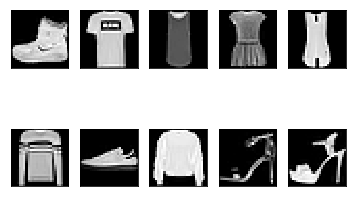

In [9]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_FMNIST[i].view(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])

In [20]:
torch.inf

AttributeError: module 'torch' has no attribute 'inf'